# 10.5.1 Deep Q-Networks (DQN)

## Explanation of Deep Q-Networks (DQN)

Deep Q-Networks (DQN) are an advanced reinforcement learning technique that combines Q-Learning with deep neural networks. The primary goal of DQN is to enable agents to make decisions in complex environments with high-dimensional state spaces, where traditional tabular Q-Learning becomes impractical. 

In DQN, a deep neural network, called the Q-network, is used to approximate the Q-value function. The Q-network takes the current state as input and outputs the Q-values for all possible actions. The action with the highest Q-value is then selected as the optimal action for the given state. The network is trained by minimizing the loss between the predicted Q-values and the target Q-values obtained using the Bellman equation.

## Algorithm for Implementing DQN

1. **Define the Environment:** Start by defining the environment in which the agent will operate, including state and action spaces.

2. **Initialize Q-Network:** Initialize a neural network to approximate the Q-value function. The network takes states as input and outputs Q-values for each possible action.

3. **Experience Replay Buffer:** Implement an experience replay buffer to store the agent's experiences, including state, action, reward, next state, and done flag. This buffer is used to sample mini-batches for training the network.

4. **Target Network:** Create a target network, which is a copy of the Q-network, to generate target Q-values. The target network is updated less frequently than the Q-network to improve stability.

5. **Epsilon-Greedy Policy:** Implement an epsilon-greedy policy for action selection. The agent selects a random action with probability epsilon (exploration) and selects the action with the highest Q-value with probability (1-epsilon) (exploitation).

6. **Training Loop:** The training loop involves:
   - Selecting an action using the epsilon-greedy policy.
   - Executing the action and observing the next state and reward.
   - Storing the experience in the replay buffer.
   - Sampling a mini-batch from the replay buffer and computing the target Q-values.
   - Minimizing the loss between the predicted Q-values and the target Q-values using backpropagation.
   - Periodically updating the target network.

7. **Convergence:** Continue training until the Q-network converges to an optimal policy, meaning the agent consistently makes decisions that maximize cumulative rewards.

By following these steps, DQN can be effectively implemented to solve various complex reinforcement learning problems where traditional methods may fail.


___
___
### Readings:
- [Q-Learning vs. Deep Q-Learning vs. Deep Q-Network](https://www.baeldung.com/cs/q-learning-vs-deep-q-learning-vs-deep-q-network)
- [The Deep Q-Learning Algorithm](https://huggingface.co/learn/deep-rl-course/en/unit3/deep-q-algorithm)
- [A Hands-On Introduction to Deep Q-Learning using OpenAI Gym in Python](https://www.analyticsvidhya.com/blog/2019/04/introduction-deep-q-learning-python/)
- [Deep-Q-Learning \(ipynb\)](https://github.com/fg91/Deep-Q-Learning/blob/master/DQN.ipynb)

___
___


## Benefits and Use Cases of DQN

**Benefits of DQN:**

1. **Scalability:** DQN can handle environments with large or continuous state spaces, which are difficult for traditional Q-Learning.
2. **Generalization:** By using deep neural networks, DQN can generalize learning across similar states, improving learning efficiency.
3. **Experience Replay:** DQN utilizes experience replay, which allows the agent to learn from past experiences by sampling and reusing them during training. This technique helps break the correlation between consecutive experiences, stabilizing the learning process.
4. **Target Network:** DQN introduces a separate target network to stabilize training by reducing oscillations and divergence, which are common issues in Q-learning with function approximation.

**Use Cases of DQN:**

- **Gaming:** DQN has been successfully applied in various gaming environments, such as playing Atari games, where it learns to outperform human players.
- **Robotics:** DQN is used in robotic control tasks, where the agent learns to perform actions like navigation, manipulation, or locomotion.
- **Autonomous Vehicles:** DQN can be used in the development of self-driving cars, helping the vehicle to make real-time decisions based on sensory inputs.
- **Financial Markets:** In finance, DQN is applied to optimize trading strategies and portfolio management by learning from market data.


In [1]:
import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque
import random
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
class DeepQNetworkAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state,verbose=0)[0]))
            target_f = self.model.predict(state,verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def plot_rewards(self, rewards):
        plt.plot(rewards)
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.title('Reward over Episodes')
        plt.show()

In [4]:
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DeepQNetworkAgent(state_size, action_size)
batch_size = 32
episodes = 101
rewards = []

for episode in range(episodes):
    state = env.reset()
    state=list(state)[0]
    state = np.reshape(state, [1, state_size])
    reward_sum = 0
    for time in range(500):
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        reward_sum += reward
        if done:
            if episode%10==0:
                print("episode: {}/{}, score: {}, e: {:.2}".format(episode, episodes, time, agent.epsilon))
            rewards.append(reward_sum)
            break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

episode: 0/101, score: 31, e: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━

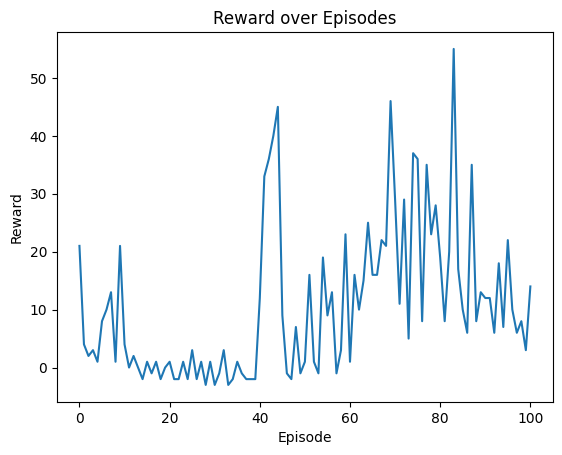

In [5]:
agent.plot_rewards(rewards)

## Conclusion
Deep Q-Networks (DQN) represent a significant advancement in reinforcement learning, especially for environments with high-dimensional state spaces. This implementation demonstrated the core components of DQN, including experience replay, target network updates, and epsilon-greedy policy. By applying DQN to the CartPole-v1 environment, we observed how an agent can learn to balance the pole by maximizing cumulative rewards over time. This example serves as a foundation for exploring more complex applications of DQN in various domains.